# Calculating the number of mutations expected per serial interval

This is a notebook taken directly from Alli Black, [here])(https://github.com/blab/ebola-narrative-ms/blob/master/scripts/mutations-and-serial-intervals.ipynb). Alli developed this really lovely little Poisson method for calculating the expected number of mutations per genome per serial interval given a rate of evolution and genome length. I would like to use this to calculate this same thing for SARS-CoV2 as a way to determine the likelihood that that one transmission pair is within a serial interval given that 3 mutations separate them. 

In [1]:
import numpy as np
%matplotlib inline
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#the math
subs_per_genome_per_year = 21.975   # from nextstrain.org/ncov/global
print("There are {} substitutions that accrue on average across the genome after one year.".format(subs_per_genome_per_year))

subs_per_genome_per_day = subs_per_genome_per_year/365.25
serial_interval = 5.0 #days, from Van Kerkhove et al. 2015
subs_per_genome_per_serial_interval = subs_per_genome_per_day * serial_interval
print("On average we expect {} substitutions to accrue over a single serial interval of 5 days.".format(subs_per_genome_per_serial_interval))

#subs_per_genome_per_serial interval is an average of how many substitutions we would expect to accrue over a serial interval
#in reality the observed number of substitutions is discrete, and we see, 0, 1, 2, etc. mutations with different probabilities,
#which is what we plot below: the probability of x subsitutions observed given a SINGLE serial interval.

There are 21.975 substitutions that accrue on average across the genome after one year.
On average we expect 0.3008213552361396 substitutions to accrue over a single serial interval of 5 days.


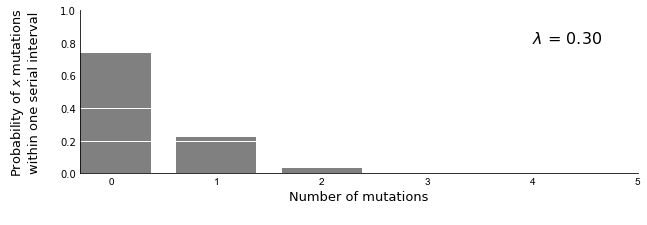

In [5]:
fig,ax = fig, ax = plt.subplots(figsize=(10, 3),facecolor='w')
x = np.arange(0,4,1)

rv = poisson(subs_per_genome_per_serial_interval)
ax.vlines(x, 0, rv.pmf(x), colors='grey', linestyles='-', lw=80)
ax.set_ylabel("Probability of $x$ mutations" +"\n"+ "within one serial interval" +"\n", size = 13)
ax.set_ylim(0,1)
ax.set_xlim(-0.3,4)
ax.set_xlabel("Number of mutations"+"\n", size = 13)
plt.xticks(np.arange(0, 6, step=1))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
    
    
ax.text(4,0.8,'$\lambda$ = 0.30', size = 16)
plt.setp(ax.get_xticklabels(), visible=True)
plt.setp(ax.get_yticklabels(), visible=True)
ax.tick_params(axis='both', which='both', length=0)


ax.hlines(0.2, -1, 6, colors='white', linestyles='solid', lw=1)
ax.hlines(0.4, -1, 6, colors='white', linestyles='solid', lw=1)

plt.savefig("/Users/lmoncla/src/ncov-WI-within-host/figures/serial-interval-mutations.pdf", dpi=300)

# Way 1 of thinking about this: Stochastic draws

Just do 100 draws from poisson distributions where the mean is mutation rate per serial multiplied by the number of serial intervals.

In [6]:
# but we may also want to look at the distribution of number of mutations we would expect to observe after 1,2,3,4,...n serial intervals.
# to look at that I'm going to sample from poisson distributions with varying means.
from numpy.random import RandomState
seed = RandomState(12345678)

muts_given_one_serial_interval = seed.poisson(lam=subs_per_genome_per_serial_interval, size=100)

muts_given_two_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*2), size=100)

muts_given_three_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*3), size=100)

muts_given_four_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*4), size=100)

muts_given_five_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*5), size=100)

muts_given_six_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*6), size=100)

muts_given_seven_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*7), size=100)

muts_given_eight_serial_intervals = seed.poisson(lam=(subs_per_genome_per_serial_interval*8), size=100)


#poisson_draws_data_dict = {"one":muts_given_one_serial_interval, "two":muts_given_two_serial_intervals, "three":muts_given_three_serial_intervals, "four":muts_given_four_serial_intervals, "five":muts_given_five_serial_intervals}

#mutations_intervals_df = pd.DataFrame(data=[muts_given_one_serial_interval, muts_given_two_serial_intervals, muts_given_three_serial_intervals, muts_given_four_serial_intervals, muts_given_five_serial_intervals]).T
#mutations_intervals_df.columns=["one_interval","two_intervals","three_intervals", "four_intervals", "five_intervals"]

one_interval_tuple_list=[("one",draw) for draw in muts_given_one_serial_interval]
two_interval_tuple_list=[("two",draw) for draw in muts_given_two_serial_intervals]
three_interval_tuple_list=[("three",draw) for draw in muts_given_three_serial_intervals]
four_interval_tuple_list=[("four",draw) for draw in muts_given_four_serial_intervals]
five_interval_tuple_list=[("five",draw) for draw in muts_given_five_serial_intervals]
six_interval_tuple_list=[("six",draw) for draw in muts_given_six_serial_intervals]
seven_interval_tuple_list=[("seven",draw) for draw in muts_given_seven_serial_intervals]
eight_interval_tuple_list=[("eight",draw) for draw in muts_given_eight_serial_intervals]

master_list = one_interval_tuple_list+two_interval_tuple_list+three_interval_tuple_list+four_interval_tuple_list+five_interval_tuple_list+six_interval_tuple_list+seven_interval_tuple_list+eight_interval_tuple_list

tidy_long_poisson_draws_df = pd.DataFrame(master_list, columns=["n_serial_intervals","poisson_draw_substitution_count"])
tidy_long_poisson_draws_df

,n_serial_intervals,poisson_draw_substitution_count
0,one,0
1,one,0
2,one,0
3,one,0
4,one,0
...,...,...
795,eight,2
796,eight,5
797,eight,2
798,eight,4


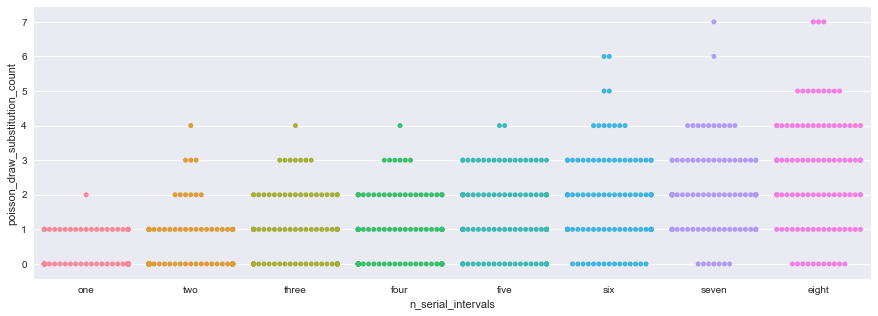

In [7]:
import seaborn as sns
fig,ax = fig, ax = plt.subplots(figsize=(15, 5),facecolor='w')
sns.swarmplot(x=tidy_long_poisson_draws_df["n_serial_intervals"], y=tidy_long_poisson_draws_df["poisson_draw_substitution_count"])

# Way 2 of thinking about this. Plot the deterministic probabilities.

In [17]:
n_serial_intervals = 1
n_mutations_to_assess_probability_of = 3

poisson_distribution = poisson(subs_per_genome_per_serial_interval*n_serial_intervals)

probabilities_of_n_mutations_given_poisson_dist = poisson_distribution.pmf(n_mutations_to_assess_probability_of) #gives probability of x mutations for all of the mutations counts you're wondering about.
print(probabilities_of_n_mutations_given_poisson_dist)
#probability_based_observation_counts = (100*probabilities_of_n_mutations_given_poisson_dist)
#print(probability_based_observation_counts)


0.0033583788440182984


In [50]:
def get_probability_given_n_muts_and_n_serial_intervals(subs_per_genome_per_serial_interval, n_serial_intervals, n_mutations_to_assess_probability_of):
    '''
    this returns a numpy array with an integer count representing out of 100 trials, how many times you'd expect to see x mutations.
    subs_per_genome_per_serial_interval is a float describing the number of substitutions you'd expect to see across the genome after a single serial interval.
    n_serial_intervals is an integer that describes how many serial intervals you're interested in.
    n_mutations_to_assess_probability_of is a list of integers from 0 to however many you choose that represents 0 mutations, 1 mutation etc.
    '''
    poisson_distribution = poisson(subs_per_genome_per_serial_interval*n_serial_intervals)
    return poisson_distribution.pmf(n_mutations_to_assess_probability_of) 
    

    
def get_observations_array(n_mutations_to_assess_probability_of, probability_based_observation_counts):
    '''
       n_mutations_to_assess_probability_of is a list of integers from 0 to however many you choose.
       probability_based_observation_counts is also a list of the number of times you will observe
    '''
    list_of_numpy_arrays = []

    for i in range(len(n_mutations_to_assess_probability_of)):
        if probability_based_observation_counts[i] != 0.0: #if there are actually observations of this number of substitutions
            array = np.empty(int(probability_based_observation_counts[i]))#make an array that is as large as the number of observations
            array.fill(n_mutations_to_assess_probability_of[i])
            list_of_numpy_arrays.append(array)
    full_array = np.hstack(list_of_numpy_arrays)
    return full_array

In [59]:
serial_interval_labels = ["One","Two","Three","Four","Five","Six","Seven","Eight"]
serial_interval_integers = [i for i in range(1,9)]
n_mutations_to_assess_probability_of = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
full_list = []

for i in serial_interval_integers:
    for x in n_mutations_to_assess_probability_of:
        prob = get_probability_given_n_muts_and_n_serial_intervals(subs_per_genome_per_serial_interval,i,x)
        labelled_array = [(serial_interval_labels[i-1], x, prob) ]
        full_list = full_list + labelled_array

#print(full_list)
#for i in range(1,len(serial_interval_integers)+1):
    #print(serial_interval_integers[i])
    #print(serial_interval_labels[i])
    #print(i)
    #counts_after_interval = get_probability_based_observation_counts(subs_per_genome_per_serial_interval, i, n_mutations_to_assess_probability_of)
    #interval_observation_array = get_observations_array(n_mutations_to_assess_probability_of,counts_after_interval) 
    #labelled_array = [(serial_interval_labels[i-1], int(observation)) for observation in interval_observation_array]
    #full_list = full_list + labelled_array

tidy_longform_data = pd.DataFrame(full_list, columns=["n_serial_intervals", "n_mutations","poisson_probability"])
print(tidy_longform_data)

    n_serial_intervals  n_mutations  poisson_probability
0                  One            0         4.180994e-01
1                  One            1         3.645978e-01
2                  One            2         1.589712e-01
3                  One            3         4.620955e-02
4                  One            4         1.007410e-02
5                  One            5         1.756996e-03
6                  One            6         2.553606e-04
7                  One            7         3.181196e-05
8                  One            8         3.467647e-06
9                  One            9         3.359904e-07
10                 One           10         2.929957e-08
11                 One           11         2.322753e-09
12                 One           12         1.687937e-10
13                 One           13         1.132263e-11
14                 One           14         7.052676e-13
15                 One           15         4.100126e-14
16                 Two         

Text(0,0.5,'Observed number of substitutions')

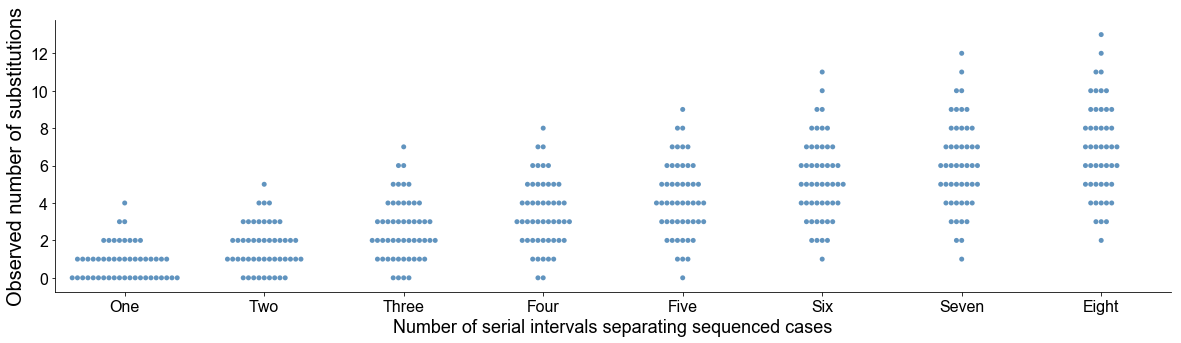

In [444]:
fig,ax = fig, ax = plt.subplots(figsize=(20, 5),facecolor='w')
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.swarmplot(x=tidy_longform_data["n_serial_intervals"], y=tidy_longform_data["poisson_draw_substitution_count"], size=5, color="#6194bf")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16)

for tick in ax.get_xticklabels():
    tick.set_fontname("arial")
    
for tick in ax.get_yticklabels():
    tick.set_fontname("arial")

ax.set_xlabel("Number of serial intervals separating sequenced cases", fontname = "arial", size=18)
ax.set_ylabel("Observed number of substitutions", fontname = "arial", size=20)


[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]


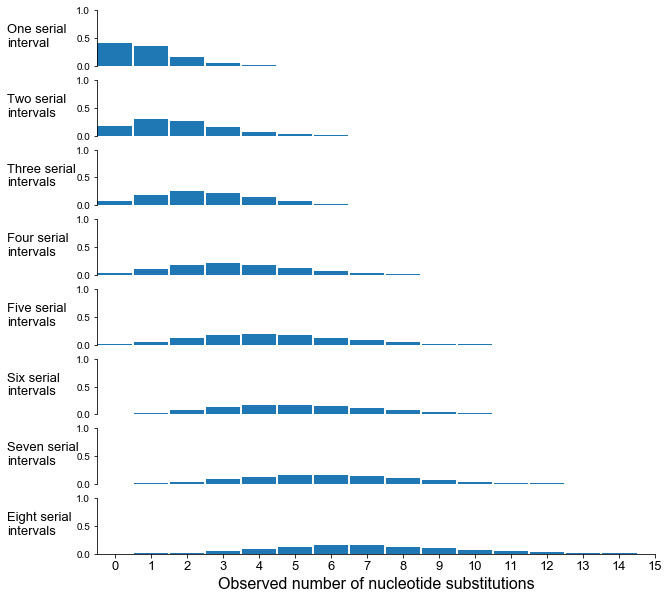

In [86]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(nrows=8, ncols=1, hspace=0.25, wspace=3)
fig = plt.subplots(figsize=(10,10), facecolor="w")

data = tidy_longform_data
grouped_data = tidy_longform_data.groupby("n_serial_intervals", sort=False)
num_groups = len(grouped_data.groups.keys())

ax.set_xlabel("Number of serial intervals separating sequenced cases", fontname = "arial", size=18)
ax.set_ylabel("Observed number of substitutions", fontname = "arial", size=20)


for i,(n_serial_intervals, data_for_that_serial_interval) in enumerate(grouped_data):
    #print(n_serial_intervals[1]["poisson_probability"])

    
    ax = plt.subplot(grid[i])
    #counts = np.bincount(data_by_serial_interval["poisson_draw_substitution_count"])
    plt.bar(height=data_for_that_serial_interval["poisson_probability"], x=data_for_that_serial_interval["n_mutations"], width=1, align='center')
    ax.set_xlim(-0.5,15)
    ax.set_ylim(0,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("Observed number of nucleotide substitutions", rotation=0, size=16, fontname = "arial")
    plt.vlines(ymin=0, ymax=25, x=[x +0.5 for x in range(0,14)], color="white", lw=2)
    
    if i == 7:
        ax.spines["bottom"].set_visible(True)
        plt.xticks(range(16), size=13)

    elif i != 7:
        ax.spines["bottom"].set_visible(False)
        ax.set_xticklabels([])
        ax.get_xaxis().set_visible(False)
    
    
    if i == 0:
        plt.text(-3,0.35,"{} serial".format(n_serial_intervals) + "\n"+"interval", size=13, fontname = "arial")
    elif i != 0:
        plt.text(-3,0.35,"{} serial".format(n_serial_intervals) + "\n"+"intervals", size=13, fontname = "arial")



    for tick in ax.get_xticklabels():
        tick.set_fontname("arial") 
    for tick in ax.get_yticklabels():
        tick.set_fontname("arial")


plt.savefig("/Users/alliblk/Desktop/gitrepos/ebola-narrative-ms/figures/observed-sub-counts.png", )